## Autoencoder for extreme rare-event classification

### 前言:
#### 1. 混淆矩陣(Confusion matrix): 用來評估模型的表現(performance)

二元分類(the binary classification)的混淆矩陣(Confusion matrix):

| |  **預測為正(Scored Positive)**  |  **預測為負(Scored Negative)**  |  
|------|:------:|:------:| 
|**實際為正(Actual Positive)**|True Positive (TP)|False Negative (FN)<br>Type II Error|
|**實際為負(Actual Negative)**|False Positive (FP)<br>Type I Error|True Negative (TN)|   

- True Positive(TP): 正標籤且被正確的歸類為正標籤

- True Negative(TN): 負標籤且被正確的歸類為負標籤

- False Positive(FP): 負標籤但被不正確的歸類為正標籤

- False Negative(FN): 正標籤但被不正確的歸類為負標籤

[註] 標籤(labels)標示的慣例: 1 代表正標籤，0 代表負標籤。

#### 2. 由混淆矩陣(Confusion matrix)衍生出的評估指標

常用的指標:

- **正確率(Accuracy):** (正 + 負)標籤正確被歸類的比率

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$

- **精確率(Precision)、Positive Predictive Value (PPV):** 預測是正標籤的情形下，實際為正標籤的比率

$$ Precision、PPV = \frac{TP}{TP + FP} $$

- **召回率(Recall)、True Positive Rate (TPR)、靈敏度(Sensitivity):** 實際是正標籤的情形下，預測為正標籤的比率 

$$ Recall、TPR、Sensitivity = \frac{TP}{TP + FN} $$

- **F1 score/measure:** 精確率(Precision)和召回率(Recall)在模型中占相同重要性的評估指標

$$ F1 = 2 \cdot  \frac{Precision \cdot  Recall}{Precision + Recall} $$

[註] F measure:

$$ F_{\beta} = (1 + \beta^{2}) \cdot \frac{Precision \cdot  Recall}{(\beta^{2}\cdot Precision) + Recall} $$

(1)當 $\beta = 0$, F measure = Precision
    
(2)當 $\beta = 1$, F measure = F1 score/measure
    
(3)當 $\beta \rightarrow \infty$, F measure = Recall
    
其他指標:

- False Negative Rate (FNR) =$ \frac{FN}{TP + FN} $
 
 
- False Positive Rate (FPR) =$ \frac{FP}{FP + TN} $


- True Negative Rate (TNR)、特異度(Specificity) =$ \frac{TN}{FP + TN} $


- False Discovery Rate (FDR) =$ \frac{FP}{TP + FP} $


- False Omission Rate (FOR) =$ \frac{FN}{FN + TN} $


- Negative Predictive Value (NPV) =$ \frac{TN}{FN + TN}$


- 盛行率(Prevalence) =$ \frac{TP + FN}{TP+FP+TN+FN}$


#### 3. ROC curve (Receiver Operating Characteristic curve) and AUC (Area Under the Curve of ROC):

<img src="img/ROC_AUC.JPG" alt="drawing" width="360px"/>

#### 4. PR curve (Precision-Recall curve)

<img src="img/PR_curve.JPG" alt="drawing" width="300px"/>

#### 5. ROC 與 PR 曲線的比較
Ref 1: [What is the difference between a ROC curve and a precision-recall curve ?](https://www.quora.com/What-is-the-difference-between-a-ROC-curve-and-a-precision-recall-curve-When-should-I-use-each)

Ref 2: [PRC (PR 曲線)](https://blog.csdn.net/weixin_31866177/article/details/88776718)

**(1) 在處理不均衡的數據集(imbalanced dataset)時，PR curve 比 ROC curve 更為適用**

[註] 不均衡的數據集(imbalanced dataset):
            
    真實的負標籤樣本數相對於正標籤樣本數非常大(即真實的正標籤樣本數目非常稀少)的數據集

**(2) 例子: Fraud detection**

假設在兩百萬的交易樣本中，有 100 個非正常交易的樣本(標記為正標籤: 1)和 1,999,900 個正常交易的樣本(標記為負標籤: 0)

情況一: 100 個預測為非正常交易的樣本中有 90 個實際為非正常交易的樣本

|  |  **預測為正(Scored Positive)**  |  **預測為負(Scored Negative)**  | **總數量** |  
|:------:|:------:|:------:|:------:|
|**實際為正(Actual Positive)**| 90  | 10 | 100 |
|**實際為負(Actual Negative)**| 10  | 1,999,990 | 1,999,900 |

情況二: 1000 個預測為非正常交易的樣本中有 90 個實際為非正常交易的樣本

|  |  **預測為正(Scored Positive)**  |  **預測為負(Scored Negative)**  | **總數量** |
|:------:|:------:|:------:|:------:| 
|**實際為正(Actual Positive)**| 90  | 10 | 100 |
|**實際為負(Actual Negative)**| 910  | 1,998,990 | 1,999,900 | 


(i) 計算 ROC 曲線中的 True Positive Rate (TPR) 和 False Positive Rate (FPR):

情況一: TPR = 90/(90 + 10) = 0.9, FPR = 10/(10 + 1,999,990) = 0.00000500025 

情況二: TPR = 90/(90 + 10) = 0.9, FPR = 910/(910 + 1,998,990) = 0.00045502275 

FPR difference = 0.0004500225

(ii) 計算 PR 曲線中的精確率(Precision)和召回率(Recall):

情況一: Precision = 90/(90 + 10) = 0.9, Recall = 90/(90 + 10) = 0.9

情況二: Precision = 90/(90 + 910) = 0.09, Recall = 90/(90 + 10) = 0.9

Precision difference = 0.81

**(3) 結論: **

a. 在數據不平衡時，PR curve 對樣本比例敏感(隨著正負樣本的比例變化，PR 曲線會發生強烈的變化)，因此能夠看出分類器隨著樣本比例變化的效果，有助於了解分類器實際的效果和作用，藉以進行模型的改進。


b. ROC curve 對不平衡數據表現出一致性(即 ROC 曲線對正負樣本的比例變化不敏感，其形狀幾乎保持不變)，代表它能夠衡量一個模型本身的預測能力，而這個預測能力與正負樣本比例無關。因此，它較難以看出一個模型在面臨樣本比例變化時，模型的預測情況。

c. 實際的綜合處理:

    (i) 先使用 ROC curve 來判斷分類器的好壞，然後進行分類器的選擇。
    
    (ii) 根據 PR curve 表現出來的結果，衡量一個分類器對不均衡數據集(imbalanced dataset)進行分類的能力，進而執行模型的改進和優化。

### 實際操作: 工業數據異常偵測

- **資料集:** https://arxiv.org/abs/1809.10717


- [模型評估的工具](http://www.huaxiaozhuan.com/%E5%B7%A5%E5%85%B7/scikit-learn/chapters/4.model_select.html)


#### 一、匯入模組

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import auc, roc_curve

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

Using TensorFlow backend.


#### 二、資料預處理(Data preprocessing)

1.匯入資料

In [2]:
df = pd.read_excel("processminer-rare-event-mts.xlsx")

2.移動資料

- 將資料含有 y=1 的欄位向前移動兩列(row n -> n-2)作為事前預測，並將列 n-2、n-1 的 y 值設為 1 
- 去除原始資料裡 y=1 的資料， y=0 的資料當作訓練資料

In [3]:
sign = lambda x: (1, -1)[x < 0]    

def curve_shift(df, shift):
    
    col_label = 'y'
    
    # copy y column to vector
    vector = df[col_label].copy()
    
    for s in range(abs(shift)):
        tmp = vector.shift(sign(shift))
        tmp = tmp.fillna(0)
        vector += tmp
    
    # Add vector to the df (loc: 要插入欄位的 index)
    df.insert(loc = 2, column = 'y_tmp', value = vector)
    
    # Remove the rows with col_label == 1.
    df = df.drop(df[df[col_label] == 1].index)
    
    # Drop col_label and rename the y_tmp col as col_label
    df = df.drop(col_label, axis = 1)
    df = df.rename(columns={'y_tmp': col_label})
    
    # Make the col_label binary
    df.loc[df[col_label] > 0, col_label] = 1

    return df

3.顯示 y 欄位資料移動前後的差異

In [4]:
print('顯示 y 欄位移動前的資料:')
display(df.iloc[256:262, :5])
print('------------------------')
print('顯示 y 欄位移動後的資料:')
df = curve_shift(df, -2)
display(df.iloc[256:262, :5])

顯示 y 欄位移動前的資料:


,time,y,x1,x2,x3
256,1999-05-01 08:32:00,0,1.016235,-4.058394,-1.097158
257,1999-05-01 08:34:00,0,1.005602,-3.876199,-1.074373
258,1999-05-01 08:36:00,0,0.933933,-3.868467,-1.249954
259,1999-05-01 08:38:00,1,0.892311,-13.332664,-10.006578
260,1999-05-01 10:50:00,0,0.020062,-3.987897,-1.248529
261,1999-05-01 10:52:00,0,-0.109346,-5.071100,-2.409911


------------------------
顯示 y 欄位移動後的資料:


,time,y,x1,x2,x3
256,1999-05-01 08:32:00,0.0,1.016235,-4.058394,-1.097158
257,1999-05-01 08:34:00,1.0,1.005602,-3.876199,-1.074373
258,1999-05-01 08:36:00,1.0,0.933933,-3.868467,-1.249954
260,1999-05-01 10:50:00,0.0,0.020062,-3.987897,-1.248529
261,1999-05-01 10:52:00,0.0,-0.109346,-5.071100,-2.409911
262,1999-05-01 10:54:00,0.0,-0.098179,-4.070966,-3.268804


4.去除 time, x28, x61 等三個欄位

In [5]:
# Remove time column, and the categorical columns
df = df.drop(['time', 'x28', 'x61'], axis = 1)
df.iloc[256:262, :5]

,y,x1,x2,x3,x4
256,0.0,1.016235,-4.058394,-1.097158,2.327307
257,1.0,1.005602,-3.876199,-1.074373,0.844397
258,1.0,0.933933,-3.868467,-1.249954,2.875311
260,0.0,0.020062,-3.987897,-1.248529,-72.927591
261,0.0,-0.109346,-5.071100,-2.409911,-68.501153
262,0.0,-0.098179,-4.070966,-3.268804,-70.437784


5.將原始資料分成訓練、驗證和測試資料 (train, valid, and test datasets)

In [6]:
#from sklearn.model_selection import train_test_split

# Randomly select the data points
seed = 111 
data_split = 0.2

df_train, df_test = train_test_split(df, test_size = data_split, random_state = seed)

df_train, df_valid = train_test_split(df_train, test_size = data_split, random_state = seed)

# 訓練資料中，y = 0 的 data (x & y)
df_train_0 = df_train.loc[df['y'] == 0]

# 訓練資料中，y = 1 的 data (x & y)
df_train_1 = df_train.loc[df['y'] == 1]

# 訓練資料中，y = 0 的 data (x)
df_train_0_x = df_train_0.drop(['y'], axis = 1)

# 訓練資料中，y = 1 的 data (x)
df_train_1_x = df_train_1.drop(['y'], axis = 1)

# 驗證資料中，y = 0 的 data (x & y)
df_valid_0 = df_valid.loc[df['y'] == 0]

# 驗證資料中，y = 1 的 data (x & y)
df_valid_1 = df_valid.loc[df['y'] == 1]

# 驗證資料中，y = 0 的 data (x)
df_valid_0_x = df_valid_0.drop(['y'], axis = 1)

# 驗證資料中，y = 1 的 data (x)
df_valid_1_x = df_valid_1.drop(['y'], axis = 1)

# 測試資料中，y = 0 的 data (x & y)
df_test_0 = df_test.loc[df['y'] == 0]

# 測試資料中，y = 1 的 data (x & y)
df_test_1 = df_test.loc[df['y'] == 1]

# 測試資料中，y = 0 的 data (x)
df_test_0_x = df_test_0.drop(['y'], axis = 1)

# 測試資料中，y = 1 的 data (x)
df_test_1_x = df_test_1.drop(['y'], axis = 1)

6.資料標準化(Standardization): 資料轉換成 Gaussian 分佈 (mean = 0, variance = 1)

In [7]:
#from sklearn.preprocessing import StandardScaler
'''
StandardScaler 可以保存訓練資料中的參數 (平均值、標準差: scaler.mean_、scaler.std_)
(1) 將 train_data 存入 scaler: scaler = preprocessing.StandardScaler().fit(train_data)
(2) scaler: StandardScaler(copy=True, with_mean=True, with_std=True)

執行訓練資料的標準化: scaler.transform(train_data)

可以直接使用訓練資料對驗證、測試資料進行轉換: scaler.transform(valid_data)、scaler.transform(test_data)

'''

scaler = StandardScaler().fit(df_train_0_x)

df_train_0_x_rescaled = scaler.transform(df_train_0_x)

df_valid_x_rescaled = scaler.transform(df_valid.drop(['y'], axis = 1))
df_valid_0_x_rescaled = scaler.transform(df_valid_0_x)

df_test_x_rescaled = scaler.transform(df_test.drop(['y'], axis = 1))
df_test_0_x_rescaled = scaler.transform(df_test_0_x)

#### 三、建立 Autoencoder Classifier

In [8]:
# 匯入所需的模組
#from keras.models import Sequential
#from keras.layers import Dense
#from keras import regularizers

# 建立線性堆疊模型(骨架)
autoencoder = Sequential()

# 參數設定
input_layer_dim = df_train_0_x_rescaled.shape[1]
encoding_dim = 32 
hidden_dim = int(encoding_dim / 2)
decoding_dim = 16
L1_val = 1e-3

# 建立 encoder; activity_regularizer: 通過活化函數時，使用正規化
autoencoder.add(Dense(units = encoding_dim, input_dim = input_layer_dim,
                      activity_regularizer = regularizers.l1(L1_val), 
                      activation = 'tanh', name = 'encoder'))

autoencoder.add(Dense(units = hidden_dim, activation = 'relu', name = 'hidden_layer'))

# 建立 decoder
autoencoder.add(Dense(units = decoding_dim, activation = 'tanh', name = 'decoder'))

# 建立 output layer
autoencoder.add(Dense(units = input_layer_dim, activation = 'relu', name = 'output_layer'))

# 查看模型摘要
print(autoencoder.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Dense)              (None, 32)                1920      
_________________________________________________________________
hidden_layer (Dense)         (None, 16)                528       
_________________________________________________________________
decoder (Dense)              (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 59)                1003      
Total params: 3,723
Trainable params: 3,723
Non-trainable params: 0
_________________________________________________________________
None


#### 四、執行類神經網路訓練

In [9]:
autoencoder.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

train_history = autoencoder.fit(df_train_0_x_rescaled, df_train_0_x_rescaled, 
                                validation_data = (df_valid_0_x_rescaled, df_valid_0_x_rescaled),
                                epochs = 100, batch_size = 128, shuffle = True, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 11533 samples, validate on 2884 samples
Epoch 1/100
 - 2s - loss: 2.7211 - acc: 0.0475 - val_loss: 2.2777 - val_acc: 0.0832
Epoch 2/100
 - 0s - loss: 1.9175 - acc: 0.0997 - val_loss: 1.6277 - val_acc: 0.0995
Epoch 3/100
 - 0s - loss: 1.4062 - acc: 0.1076 - val_loss: 1.2615 - val_acc: 0.1096
Epoch 4/100
 - 0s - loss: 1.1512 - acc: 0.1282 - val_loss: 1.0983 - val_acc: 0.1273
Epoch 5/100
 - 0s - loss: 1.0306 - acc: 0.1496 - val_loss: 1.0149 - val_acc: 0.1682
Epoch 6/100
 - 0s - loss: 0.9634 - acc: 0.1646 - val_loss: 0.9651 - val_acc: 0.1526
Epoch 7/100
 - 0s - loss: 0.9180 - acc: 0.1785 - val_loss: 0.9267 - val_acc: 0.1727
Epoch 8/100
 - 0s - loss: 0.8844 - acc: 0.2063 - val_loss: 0.8963 - val_acc: 0.2025
Epoch 9/100
 - 0s - loss: 0.8590 - acc: 0.2143 - val_loss: 0.8696 - val_acc: 0.2212
Epoch 10/100
 - 0s - loss: 0.8375 - acc: 0.2263 - val_loss: 0.8502 - val_acc: 0.2386
Epoch 11/100
 - 0s - loss: 0.8191 - acc: 0.2362 - val_loss: 0.

Epoch 94/100
 - 0s - loss: 0.6608 - acc: 0.5186 - val_loss: 0.6731 - val_acc: 0.5107
Epoch 95/100
 - 0s - loss: 0.6603 - acc: 0.5152 - val_loss: 0.6769 - val_acc: 0.5111
Epoch 96/100
 - 0s - loss: 0.6606 - acc: 0.5201 - val_loss: 0.6761 - val_acc: 0.4969
Epoch 97/100
 - 0s - loss: 0.6610 - acc: 0.5144 - val_loss: 0.6712 - val_acc: 0.5413
Epoch 98/100
 - 0s - loss: 0.6604 - acc: 0.5254 - val_loss: 0.6685 - val_acc: 0.5156
Epoch 99/100
 - 0s - loss: 0.6588 - acc: 0.5217 - val_loss: 0.6685 - val_acc: 0.5270
Epoch 100/100
 - 0s - loss: 0.6597 - acc: 0.5199 - val_loss: 0.6772 - val_acc: 0.4997


#### 五、圖形顯示訓練過程

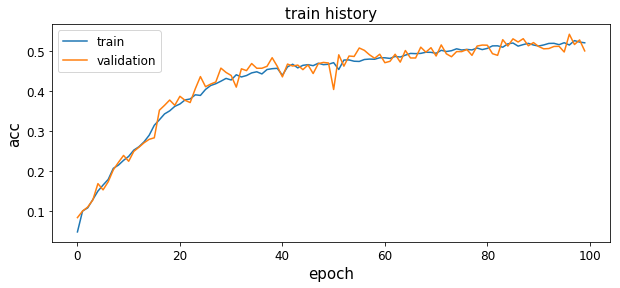

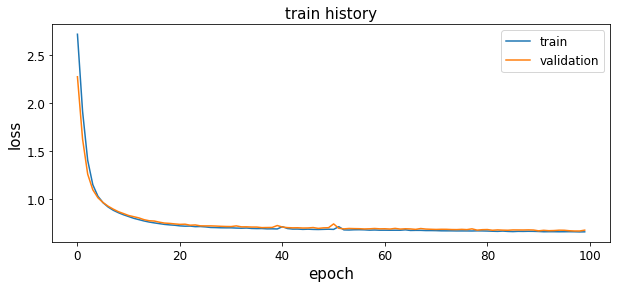

In [10]:
def show_train_history(train_history, train, validation):
    fig, ax = plt.subplots(figsize = (10, 4))
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history', fontsize = 15)
    plt.xlabel('epoch', fontsize = 15)
    plt.ylabel(train, fontsize = 15)
    ax.tick_params(axis = 'both', labelsize = 12)
    plt.legend(['train', 'validation'], fontsize = 12)
    plt.show()
    
# loss function 的變化    
show_train_history(train_history, 'acc', 'val_acc')

# accuracy 的變化
show_train_history(train_history, 'loss', 'val_loss')

#### 六、使用驗證資料辨認閥值(threshold)

In [92]:
#from sklearn.metrics import confusion_matrix, precision_recall_curve

valid_x_predictions = autoencoder.predict(df_valid_x_rescaled)

mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis = 1)

error_df = pd.DataFrame({'True_class': df_valid['y'], 'Reconstruction_error': mse})

'''
error_df.True_class: 標籤 y 的集合

error_df.Reconstruction_error: 每個樣本 x 預測 y=1 機率的集合

threshold_rt: P-R 曲線的閾值序列。該序列是一個遞增序列，當驗證樣本屬於正樣本(y=1)的機率大於或等於
              這個 threshold 時，我們預測它為正樣本(y=1)，否則為負樣本(y=0)

precision_rt: 該序列是遞增序列，序列第 i 個元素是當正樣本(y=1)機率的判定閾值為 thresholds[i] 時的精確率。

recall_rt: 該序列是遞減序列，序列第 i 個元素是當正樣本(y=1)機率的判定閾值為 thresholds[i] 時的招回率。

'''
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class,
                                                               error_df.Reconstruction_error)
print('error_df[:10]:')
print(error_df[:10])
print('------------------------------------------------------------------------------')
print('precision_rt[:10]:')
print(precision_rt[:10])
print('------------------------------------------------------------------------------')
print('recall_rt[:10]:')
print(recall_rt[:10])
print('------------------------------------------------------------------------------')
print('threshold_rt[:10]:')
print(threshold_rt[:10])
print('------------------------------------------------------------------------------')

error_df[:10]:
       Reconstruction_error  True_class
4209               0.888372         0.0
947                0.372831         0.0
12773              0.477713         0.0
11309              1.197084         0.0
12928              0.438114         0.0
16298              0.342683         0.0
9216               0.435694         0.0
15358              0.495999         0.0
7961               0.469583         0.0
9446               0.951200         0.0
------------------------------------------------------------------------------
precision_rt[:10]:
[0.01573564 0.01534829 0.01535433 0.01536038 0.01536643 0.01537249
 0.01537855 0.01538462 0.01539069 0.01539676]
------------------------------------------------------------------------------
recall_rt[:10]:
[1.    0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.975 0.975]
------------------------------------------------------------------------------
threshold_rt[:10]:
[0.28595744 0.28607206 0.28612349 0.28622213 0.28623183 0.28627669
 0.28631759 

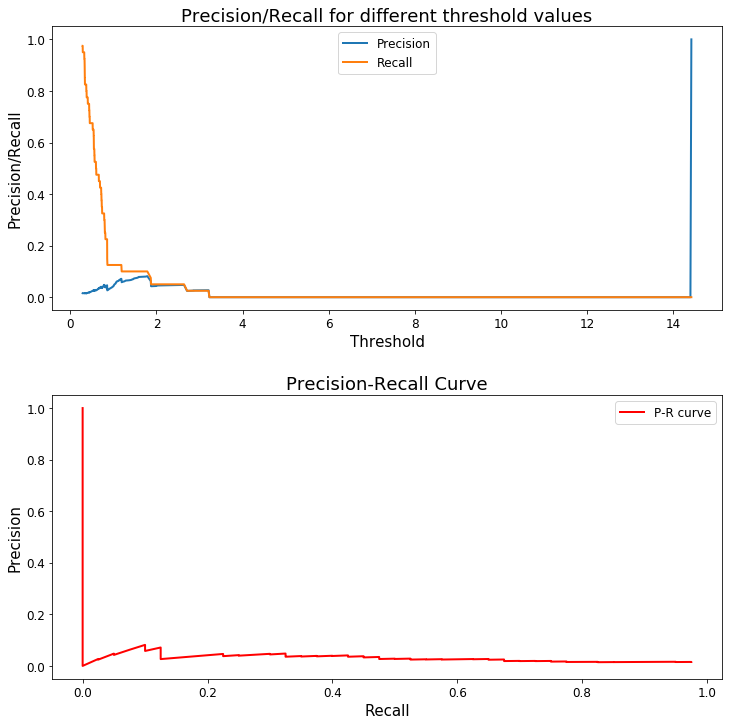

In [93]:
fig, axes = plt.subplots(2, 1, figsize = (12, 12))
plt.subplots_adjust(hspace = 0.3)

axes[0].plot(threshold_rt, precision_rt[1:], label = "Precision", linewidth = 2)
axes[0].plot(threshold_rt, recall_rt[1:], label = "Recall", linewidth = 2)
axes[0].set_title('Precision/Recall for different threshold values', fontsize = 18)
axes[0].set_xlabel('Threshold', fontsize = 15)
axes[0].set_ylabel('Precision/Recall', fontsize = 15)
axes[0].tick_params(axis = 'both', labelsize = 12)
axes[0].legend(fontsize = 12)

axes[1].plot(recall_rt[1:], precision_rt[1:], label = "P-R curve", linewidth = 2, color = 'red')
axes[1].set_title("Precision-Recall Curve", fontsize = 18)
axes[1].set_xlabel('Recall', fontsize = 15)
axes[1].set_ylabel('Precision', fontsize = 15)
axes[1].tick_params(axis = 'both', labelsize = 12)
axes[1].legend(fontsize = 12)
plt.show()

#### 七、使用測試資料進行分類

   index  Reconstruction_error  True_class
0   9076              0.333651         0.0
1  14019              0.577079         0.0
2   9711              0.458998         0.0
3  17662             13.944487         0.0
4   5323              0.208390         0.0
5  17820              0.496914         0.0
6   7859              0.424513         0.0
7  14301              0.529117         0.0
8   9299              0.306639         0.0
9  13055              0.334779         0.0
------------------------------------------------------------------------------
y=0 :
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3654],
           dtype='int64', length=3610)
------------------------------------------------------------------------------
y=1 :
Int64Index([  50,   63,   65,  274,  366,  371,  397,  403,  462,  541,  626,
             997, 1016, 1152, 1164, 1208, 1291, 1332, 1414, 1499, 1561, 1623,
 

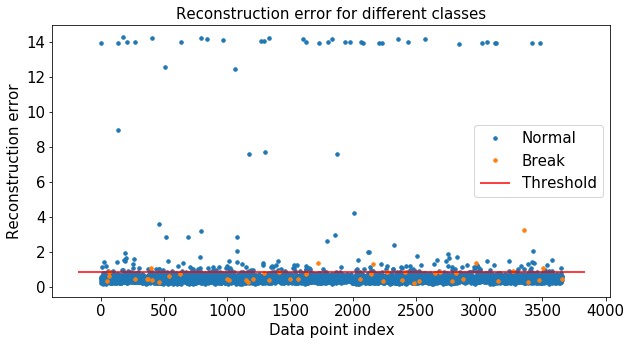

In [86]:
test_x_predictions = autoencoder.predict(df_test_x_rescaled)

mse = np.mean(np.power(df_test_x_rescaled - test_x_predictions, 2), axis = 1)

error_df_test = pd.DataFrame({'Reconstruction_error': mse, 'True_class': df_test['y']})

error_df_test = error_df_test.reset_index()

print(error_df_test.iloc[:10])
print('------------------------------------------------------------------------------')

threshold_fixed = 0.85

groups = error_df_test.groupby('True_class')

print('y=0 :')
print(groups.groups[0])
print('------------------------------------------------------------------------------')
print('y=1 :')
print(groups.groups[1])
print('------------------------------------------------------------------------------')

fig, ax = plt.subplots(figsize = (10, 5))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker = 'o', ms = 3.5, linestyle = '',
            label = "Break" if name == 1 else "Normal")

# zorder: 設置疊加順序
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors = "r", 
          zorder = 100, label = 'Threshold')

plt.title("Reconstruction error for different classes", fontsize = 15)
plt.ylabel("Reconstruction error", fontsize = 15)
plt.xlabel("Data point index", fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 15)
ax.legend(fontsize = 15)
plt.show()

#### 八、顯示混淆矩陣(confusion matrix)

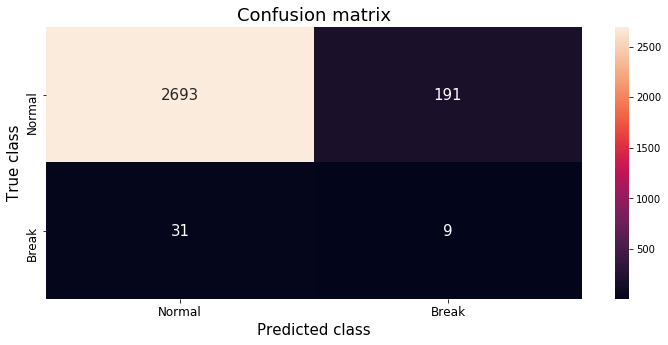

In [94]:
#import seaborn as sns

pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]

conf_matrix = confusion_matrix(error_df.True_class, pred_y)

fig, ax = plt.subplots(figsize = (12, 5))
sns.heatmap(conf_matrix, xticklabels = ["Normal","Break"], yticklabels = LABELS, fmt = "d",
            annot = True, annot_kws={"size": 15});
plt.title("Confusion matrix", fontsize = 18)
plt.ylabel('True class', fontsize = 15)
plt.xlabel('Predicted class', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

#### 九、顯示 AUC 和  ROC 曲線

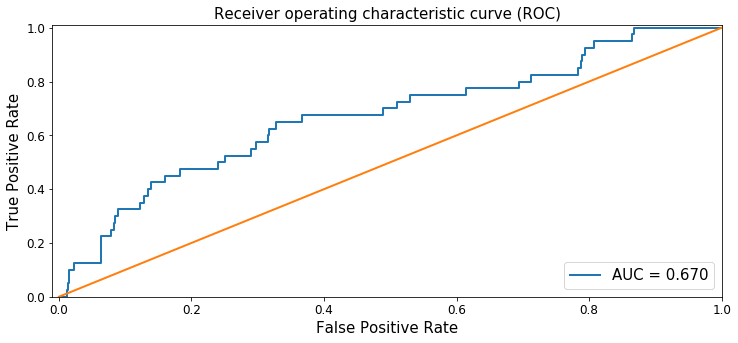

In [96]:
#from sklearn.metrics import auc, roc_curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, 
                                                      error_df.Reconstruction_error)
# 計算 AUC 值
roc_auc = auc(false_pos_rate, true_pos_rate)

fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(false_pos_rate, true_pos_rate, linewidth = 2, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0, 1], [0, 1], linewidth = 2)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc = 'lower right', fontsize = 15)
plt.title('Receiver operating characteristic curve (ROC)', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

#### Reference: 
- [Dataset: Rare Event Classification in Multivariate Time Series](https://arxiv.org/abs/1809.10717)



- [Extreme Rare Event Classification using Autoencoders in Keras](https://towardsdatascience.com/extreme-rare-event-classification-using-autoencoders-in-keras-a565b386f098)



- Github repo: https://github.com/cran2367/autoencoder_classifier